# **신용카드 사용자 연체 예측 EDA**

##**목차**
####- Data set,결측치 확인
####- Categorical Variable EDA
####- Numerical Variable EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(font_scale=2)


In [ ]:
# 한글 폰트 사용을 위한 설정
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
import matplotlib.font_manager as fm
fm._rebuild()
plt.rc('font', family='NanumGothic')
for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = "+fontInfo.fname)

NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumMyeongjo Eco = /usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumMyeongjo Eco = /usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf
Nanum Brush Script = /usr/share/fonts/truetype/nanum/NanumBrush.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumBarunpen = /usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf
NanumMyeongjo Eco = /usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf
NanumGothic Eco = /usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf
Nanum Pen Script = /usr/share/fonts/truety

In [ ]:
#데이터 파일 불러오기
data = pd.read_csv('train.csv')
data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


##**Data set,결측치 확인**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


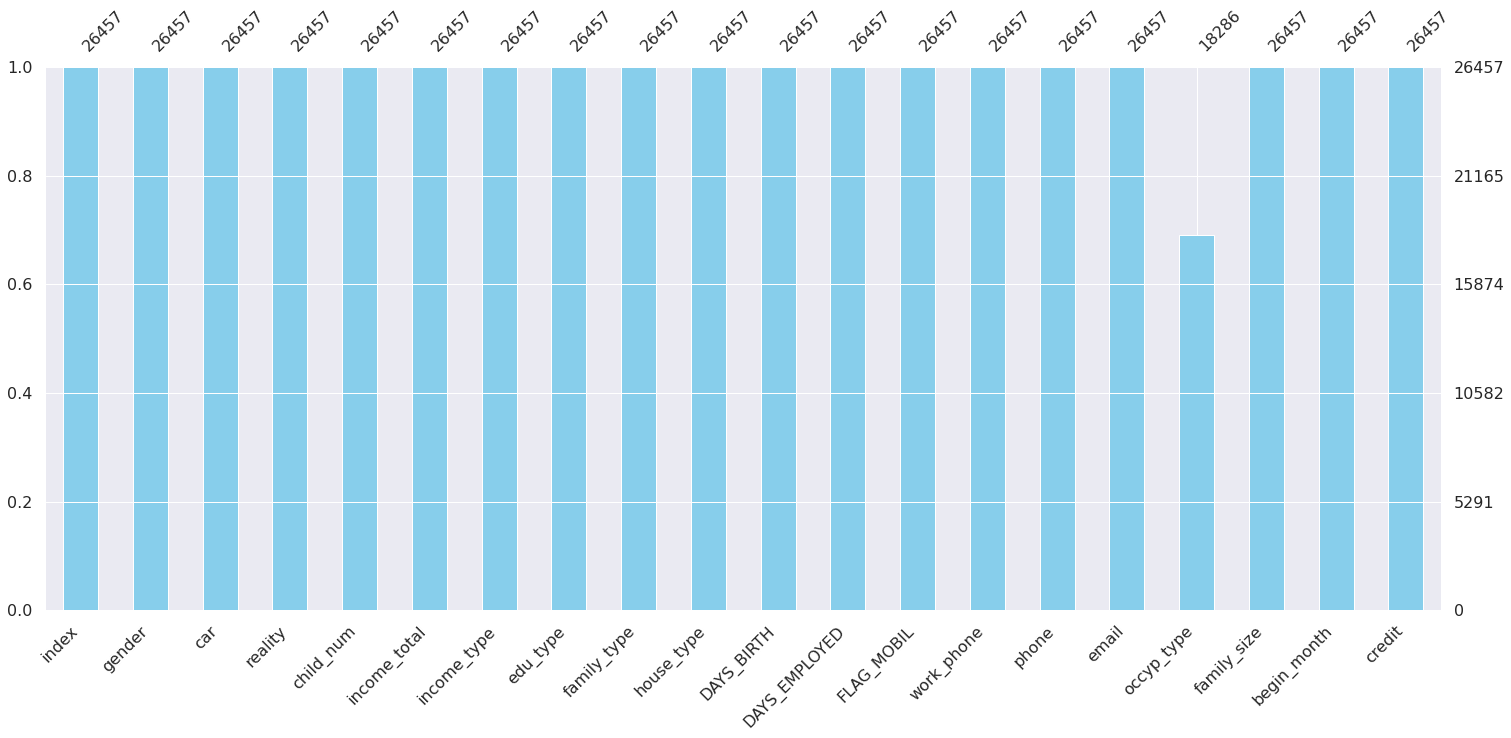

In [ ]:
print(data.info())
msno.bar(df=data.iloc[:,:], color=('skyblue'))


- 직업 유형에서 Null값이 존재한다.
- Null값이 무직(백수)로 추정되어 결측치 보정 작업을 진행한다.
- credit 변수의 data type 변환

In [ ]:
data = data.astype({'credit': 'object'})
data=data.fillna({'occyp_type':'No job'})
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     26457 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

##**Categorical Variable EDA**
##### 신용등급 비율(%)은?

In [ ]:
+data.groupby(['credit'])['gender'].count()

credit
0.0     3222
1.0     6267
2.0    16968
Name: gender, dtype: int64

In [ ]:
cmap = plt.get_cmap("Pastel1")
pick_color=cmap(np.array([0,1,4]))

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


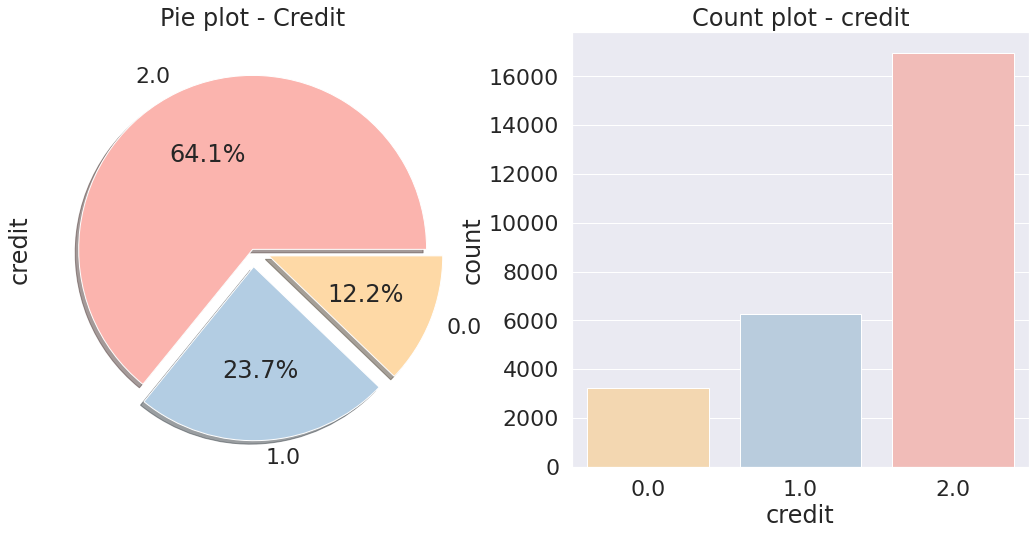

In [ ]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data['credit'].value_counts().plot.pie(explode=[0,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors=pick_color)
ax[0].set_title('Pie plot - Credit')
ax[0].set_ylabel('credit')
sns.countplot('credit',data=data,ax=ax[1],palette=cmap(np.array([4,1,0])))
ax[1].set_title('Count plot - credit')
plt.show()

- 낮을수록 높은 신용의 신용카드 사용자를 의미 -> 낮은 신용의 신용카드 사용자가 64.1%로 많음

### **변수별 신용등급 EDA**

In [ ]:
# 등급에 따른 차이를 보기 위한 데이터 분류
data_0 = data[data['credit']==0.0]
data_1 = data[data['credit']==1.0]
data_2 = data[data['credit']==2.0]

In [ ]:
# Categorical 그래프 함수 정의
def yset_plot(column,a,b):

  f, ax = plt.subplots(1, 3, figsize=(a,b)) #그래프 3개
  cmap = plt.get_cmap("Paired") #파스텔컬러 모음 선택
  pick_color1=cmap(np.array([0,1,2,3,4,5,6,7,8,9,10])) #색 선택

  sns.countplot(y = column,
                data = data_0,
                ax = ax[0],
                order = data_0[column].value_counts().index,
                palette=pick_color1)
  ax[0].tick_params(labelsize=12)
  ax[0].set_title('credit = 0')

  ax[0].tick_params(rotation=50)


  sns.countplot(y = column,
                data = data_1,
                ax = ax[1],
                order = data_1[column].value_counts().index
                ,palette=pick_color1)
  ax[1].tick_params(labelsize=12)
  ax[1].set_title('credit = 1')

  ax[1].tick_params(rotation=50)

  sns.countplot(y = column,
                data = data_2,
                ax = ax[2],
                order = data_2[column].value_counts().index,
                palette=pick_color1)
  ax[2].tick_params(labelsize=12)
  ax[2].set_title('credit = 2')

  ax[2].tick_params(rotation=50)
  plt.subplots_adjust(wspace=0.3, hspace=0.3)
  plt.show()


def xset_plot(column,a,b):

  f, ax = plt.subplots(1, 3, figsize=(a,b)) #그래프 3개
  cmap = plt.get_cmap("Pastel1") #파스텔컬러 모음 선택
  pick_color1=cmap(np.array([0,1,4,3,6])) #색 선택

  sns.countplot(x = column,
                data = data_0,
                ax = ax[0],
                order = data_0[column].value_counts().index,
                palette=pick_color1)
  ax[0].tick_params(labelsize=12)
  ax[0].set_title('credit = 0')

  ax[0].tick_params(rotation=50)


  sns.countplot(x = column,
                data = data_1,
                ax = ax[1],
                order = data_1[column].value_counts().index
                ,palette=pick_color1)
  ax[1].tick_params(labelsize=12)
  ax[1].set_title('credit = 1')

  ax[1].tick_params(rotation=50)

  sns.countplot(x = column,
                data = data_2,
                ax = ax[2],
                order = data_2[column].value_counts().index,
                palette=pick_color1)
  ax[2].tick_params(labelsize=12)
  ax[2].set_title('credit = 2')

  ax[2].tick_params(rotation=50)
  plt.subplots_adjust(wspace=0.3, hspace=0.3)
  plt.show()

###- **신용등급에 따른 성별 차이는?**

In [ ]:
data.groupby(['credit', 'gender'])['gender'].count()

credit  gender
0.0     F          2148
        M          1074
1.0     F          4220
        M          2047
2.0     F         11329
        M          5639
Name: gender, dtype: int64

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


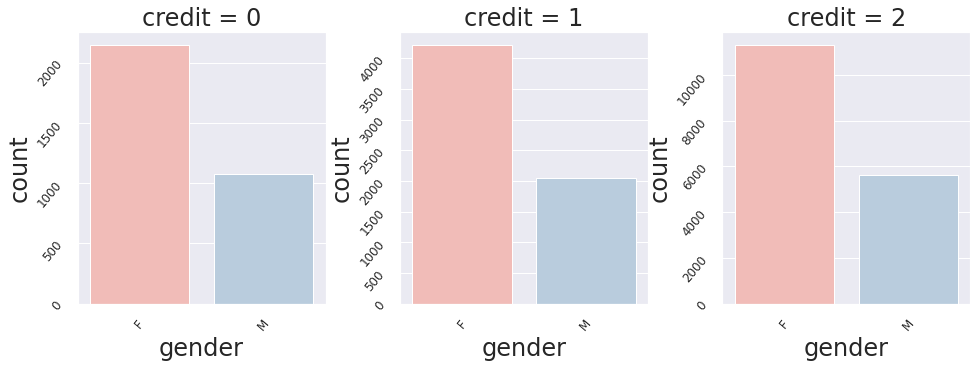

In [ ]:
xset_plot("gender",16,5) #gender(성별)로 그래프

In [ ]:
pd.crosstab(data.credit,data.gender,margins=True).style.background_gradient(cmap="Pastel1_r")

gender,F,M,All
credit,,,
0.0,2148,1074,3222
1.0,4220,2047,6267
2.0,11329,5639,16968
All,17697,8760,26457


- 모든 등급에서 여성이 남성보다 약 2배정도 많다. but 데이터양의 차이도 약2배로 데이터 수집량에 따른 차이로 보여진다.

###- **신용등급에 따른 차량 소유 차이는?**

In [ ]:
data.groupby(['credit', 'car'])['car'].count()

credit  car
0.0     N       1982
        Y       1240
1.0     N       3990
        Y       2277
2.0     N      10438
        Y       6530
Name: car, dtype: int64

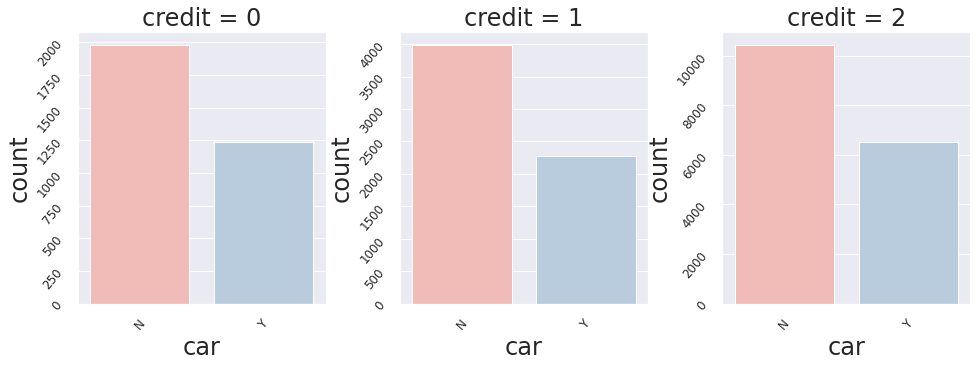

In [ ]:
xset_plot('car',16,5)

- 모든 등급에서 차를 보유하고 있지 않은 고객들이 많다.

###- **신용등급에 따른 부동산 소유 차이는?**

In [ ]:
data.groupby(['credit', 'reality'])['reality'].count()

credit  reality
0.0     N           1064
        Y           2158
1.0     N           1935
        Y           4332
2.0     N           5628
        Y          11340
Name: reality, dtype: int64

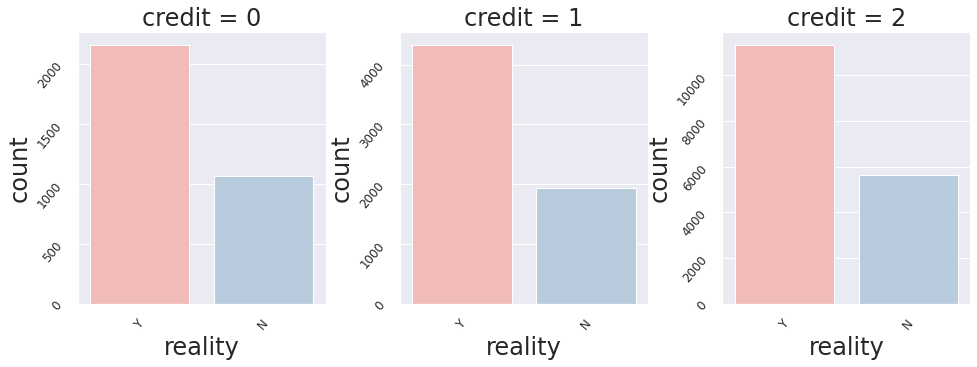

In [ ]:
xset_plot('reality',16,5)

- 모든 등급에서 부동산을 소유한 사람들이 많아, 딱히 차이가 존재 하지 않음

###- **신용등급에 따른 소득 분류 차이는?**

In [ ]:
data.groupby(['credit', 'income_type'])['income_type'].count()

credit  income_type         
0.0     Commercial associate     782
        Pensioner                536
        State servant            265
        Working                 1639
1.0     Commercial associate    1344
        Pensioner               1084
        State servant            489
        Student                    3
        Working                 3347
2.0     Commercial associate    4076
        Pensioner               2829
        State servant           1400
        Student                    4
        Working                 8659
Name: income_type, dtype: int64

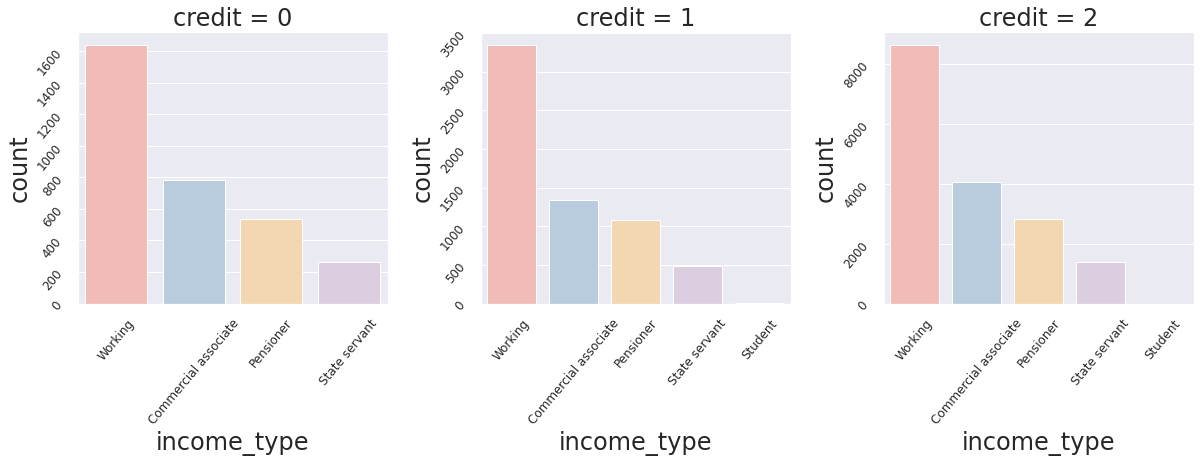

In [ ]:
xset_plot('income_type',20,5) 

- 높은 신용등급에서는 Student가 존재 하지 않았다, 그러나 1,2 등급에서의 응답이 3,4명이어서 Student의 경우 따로 더 조사할 필요가 있다.\
- 직업이 아닌 소득 분류의 차이인데, 공부중 으로 해석을 해야할 지도 고민된다.

###- **신용등급에 따른 교육 수준의 차이는?**

In [ ]:
data.groupby(['credit', 'edu_type'])['edu_type'].count()

credit  edu_type                     
0.0     Academic degree                      2
        Higher education                   909
        Incomplete higher                  114
        Lower secondary                     28
        Secondary / secondary special     2169
1.0     Academic degree                      7
        Higher education                  1751
        Incomplete higher                  246
        Lower secondary                     59
        Secondary / secondary special     4204
2.0     Academic degree                     14
        Higher education                  4502
        Incomplete higher                  660
        Lower secondary                    170
        Secondary / secondary special    11622
Name: edu_type, dtype: int64

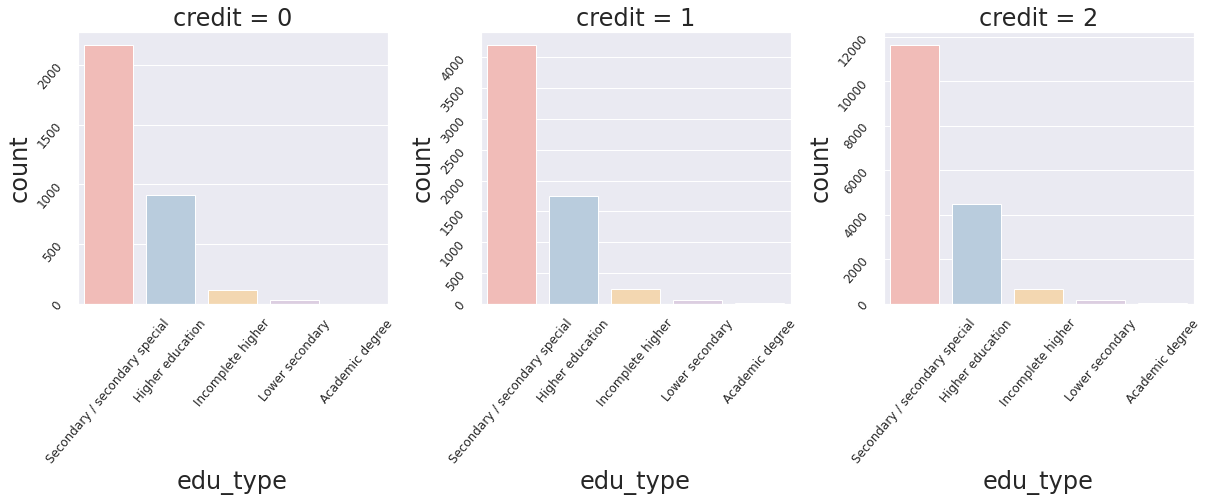

In [ ]:
xset_plot('edu_type',20,5)

- 모든 등급에서의 교육 수준의 순위가 같다.

###- **신용등급에 따른 결혼 여부 차이는?**

In [ ]:
data.groupby(['credit', 'family_type'])['family_type'].count()

credit  family_type         
0.0     Civil marriage            288
        Married                  2213
        Separated                 193
        Single / not married      402
        Widow                     126
1.0     Civil marriage            539
        Married                  4140
        Separated                 349
        Single / not married      940
        Widow                     299
2.0     Civil marriage           1296
        Married                 11843
        Separated                 997
        Single / not married     2154
        Widow                     678
Name: family_type, dtype: int64

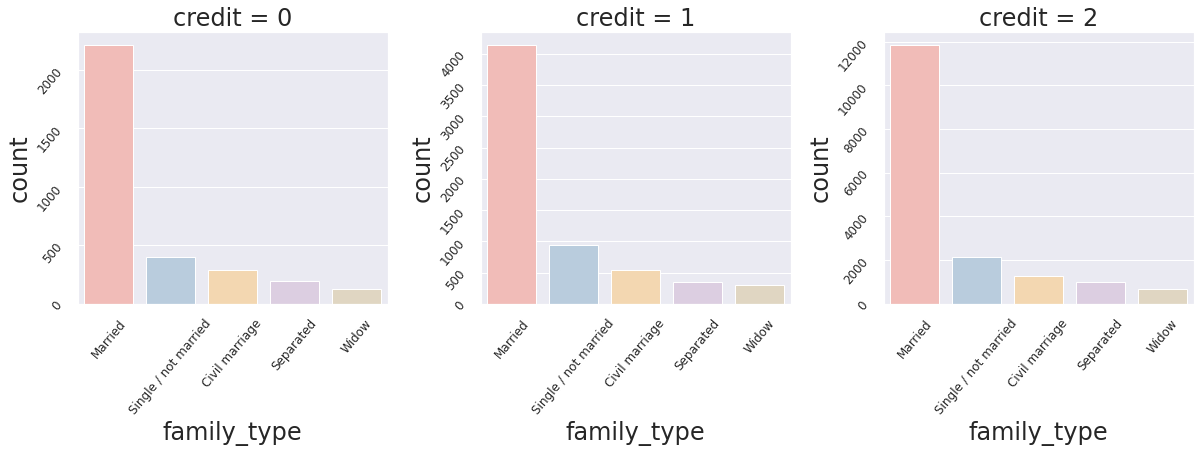

In [ ]:
xset_plot('family_type',20,5)

- 모든 등급에서 married가 가장 많았다.

###- **신용등급에 따른 생활 방식 차이는?**

In [ ]:
data.groupby(['credit', 'house_type'])['house_type'].count()

credit  house_type         
0.0     Co-op apartment           14
        House / apartment       2873
        Municipal apartment      110
        Office apartment          24
        Rented apartment          50
        With parents             151
1.0     Co-op apartment           30
        House / apartment       5569
        Municipal apartment      160
        Office apartment          48
        Rented apartment         147
        With parents             313
2.0     Co-op apartment           66
        House / apartment      15211
        Municipal apartment      548
        Office apartment         118
        Rented apartment         232
        With parents             793
Name: house_type, dtype: int64

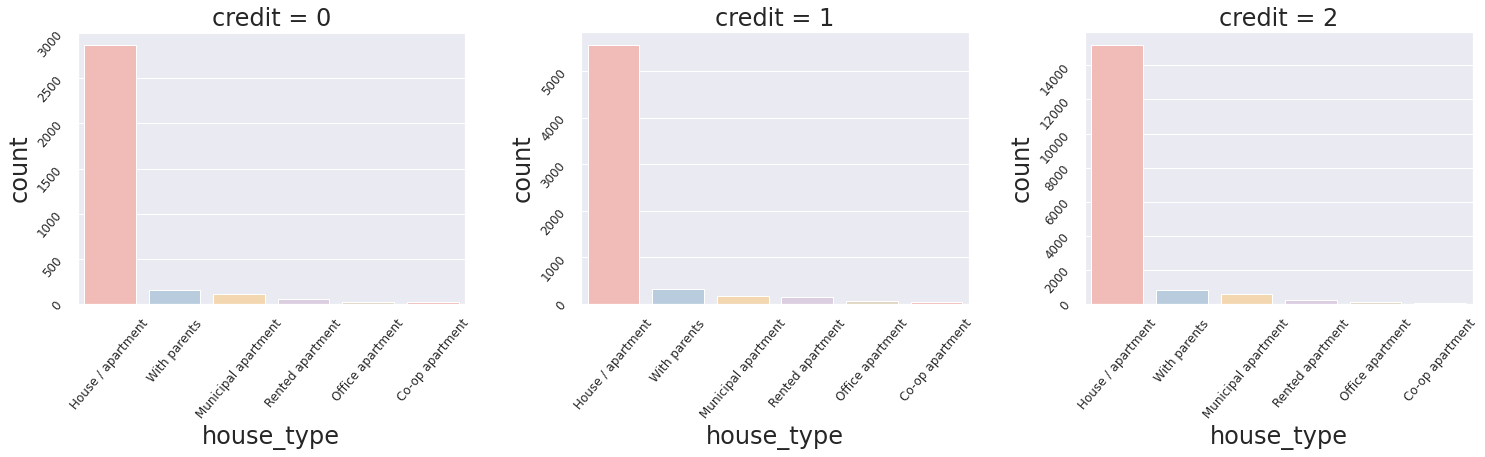

In [ ]:
xset_plot('house_type',25,5)

- 모든 등급에서 주택/아파트에 사는 사람이 가장 많다.

###- **신용등급에 따른 핸드폰 소지 차이는?**

In [ ]:
data.groupby(['credit', 'FLAG_MOBIL'])['FLAG_MOBIL'].count()

credit  FLAG_MOBIL
0.0     1              3222
1.0     1              6267
2.0     1             16968
Name: FLAG_MOBIL, dtype: int64

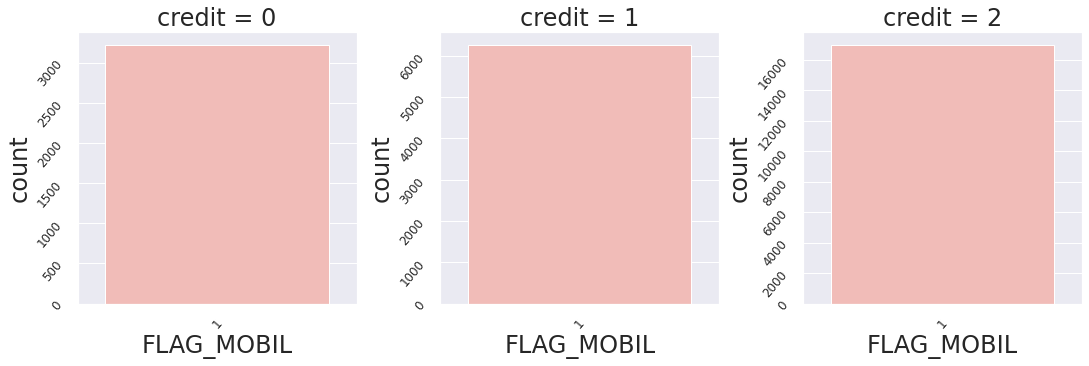

In [ ]:
xset_plot('FLAG_MOBIL',18,5)

- 모든 사람이 휴대폰을 가지고 있다.

###- **신용등급에 따른 직업 유형 차이는?**

In [ ]:
data.groupby(['credit', 'occyp_type'])['occyp_type'].count()

credit  occyp_type           
0.0     Accountants               118
        Cleaning staff             40
        Cooking staff              58
        Core staff                347
        Drivers                   187
        HR staff                    7
        High skill tech staff     123
        IT staff                    8
        Laborers                  586
        Low-skill Laborers         22
        Managers                  280
        Medicine staff             83
        No job                    967
        Private service staff      35
        Realty agents              10
        Sales staff               293
        Secretaries                 9
        Security staff             39
        Waiters/barmen staff       10
1.0     Accountants               227
        Cleaning staff             93
        Cooking staff             110
        Core staff                622
        Drivers                   358
        HR staff                    4
        High skill t

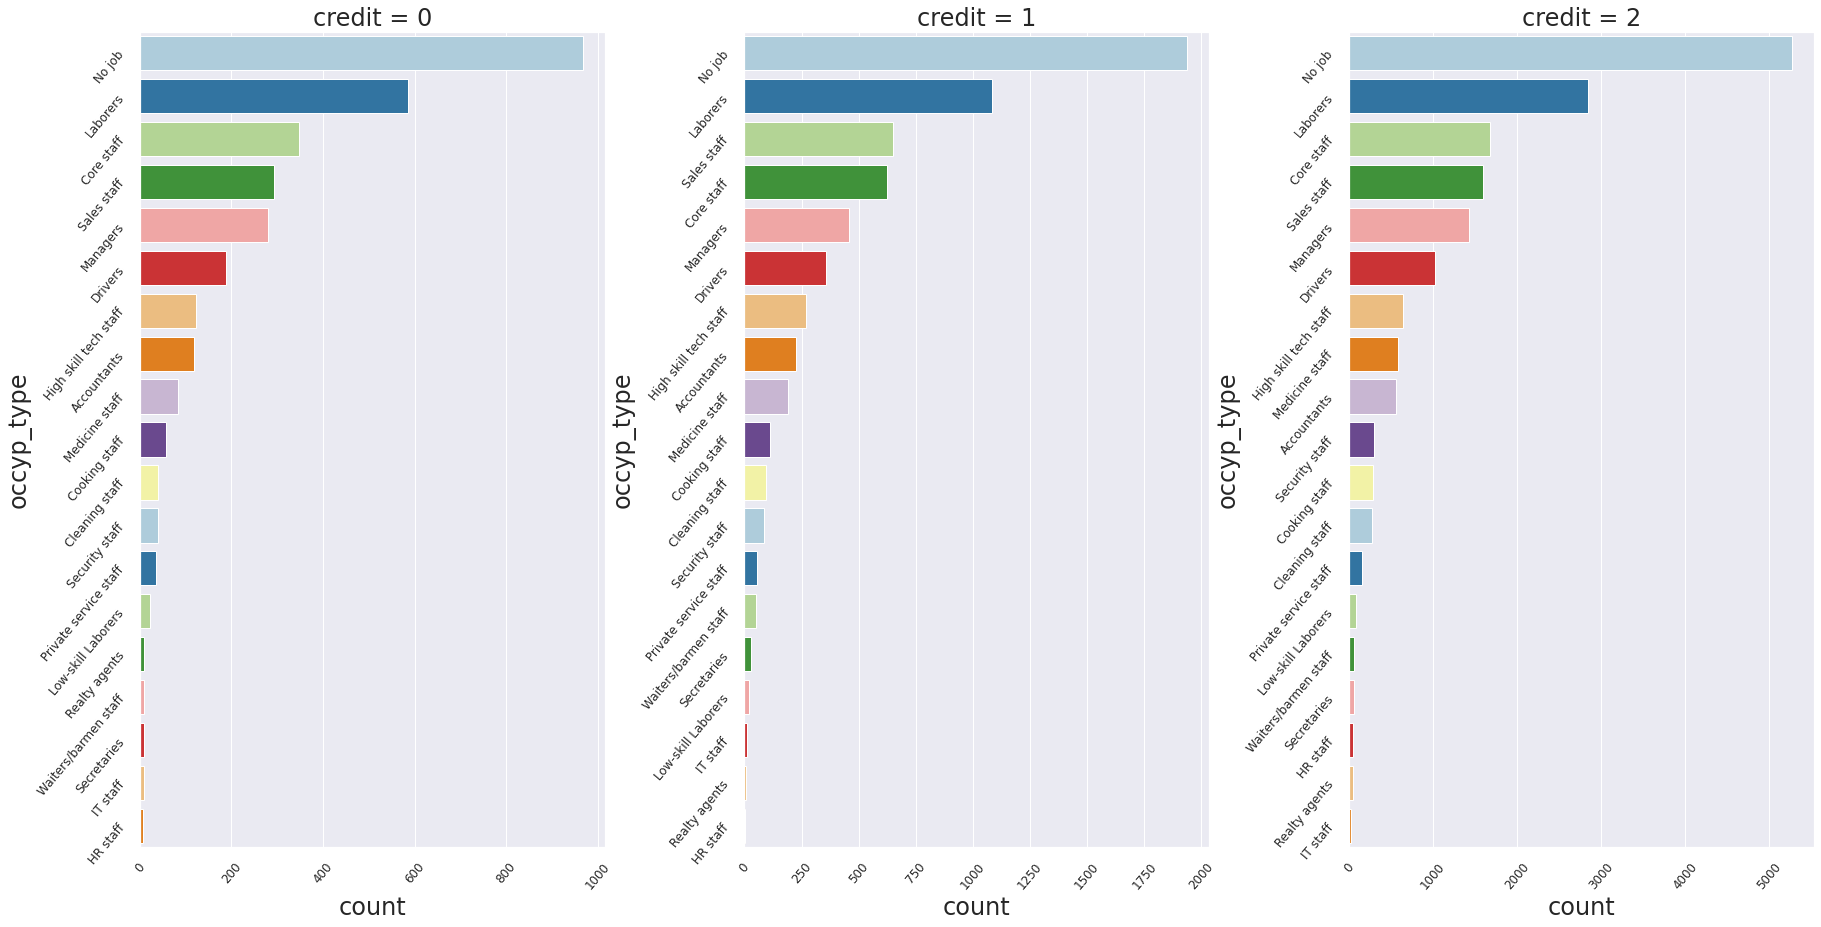

In [ ]:
yset_plot('occyp_type',30,15)

- 신용 등급별로 직업 유형의 순위 변동이 존재한다.

##**Numerical Variable EDA**

- 수치형 데이터들의 특성 먼저 확인해 봅니다.

In [ ]:
data.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


- 분석하기전, 연령대 데이터 전처리 진행

In [ ]:
data_0['Age'] = abs(data_0['DAYS_BIRTH'])/360
data_0 = data_0.astype({'Age': 'int'})
data_1['Age'] = abs(data_1['DAYS_BIRTH'])/360
data_1 = data_1.astype({'Age': 'int'})
data_2['Age'] = abs(data_2['DAYS_BIRTH'])/360
data_2 = data_2.astype({'Age': 'int'})
data_0['Age'].head()

data['Age'] = abs(data['DAYS_BIRTH'])/360
data_copy = data.astype({'Age': 'int'})
data_0['Age'].head()


3     41
7     41
12    33
15    35
22    42
Name: Age, dtype: int64

In [ ]:
corr= data.corr()

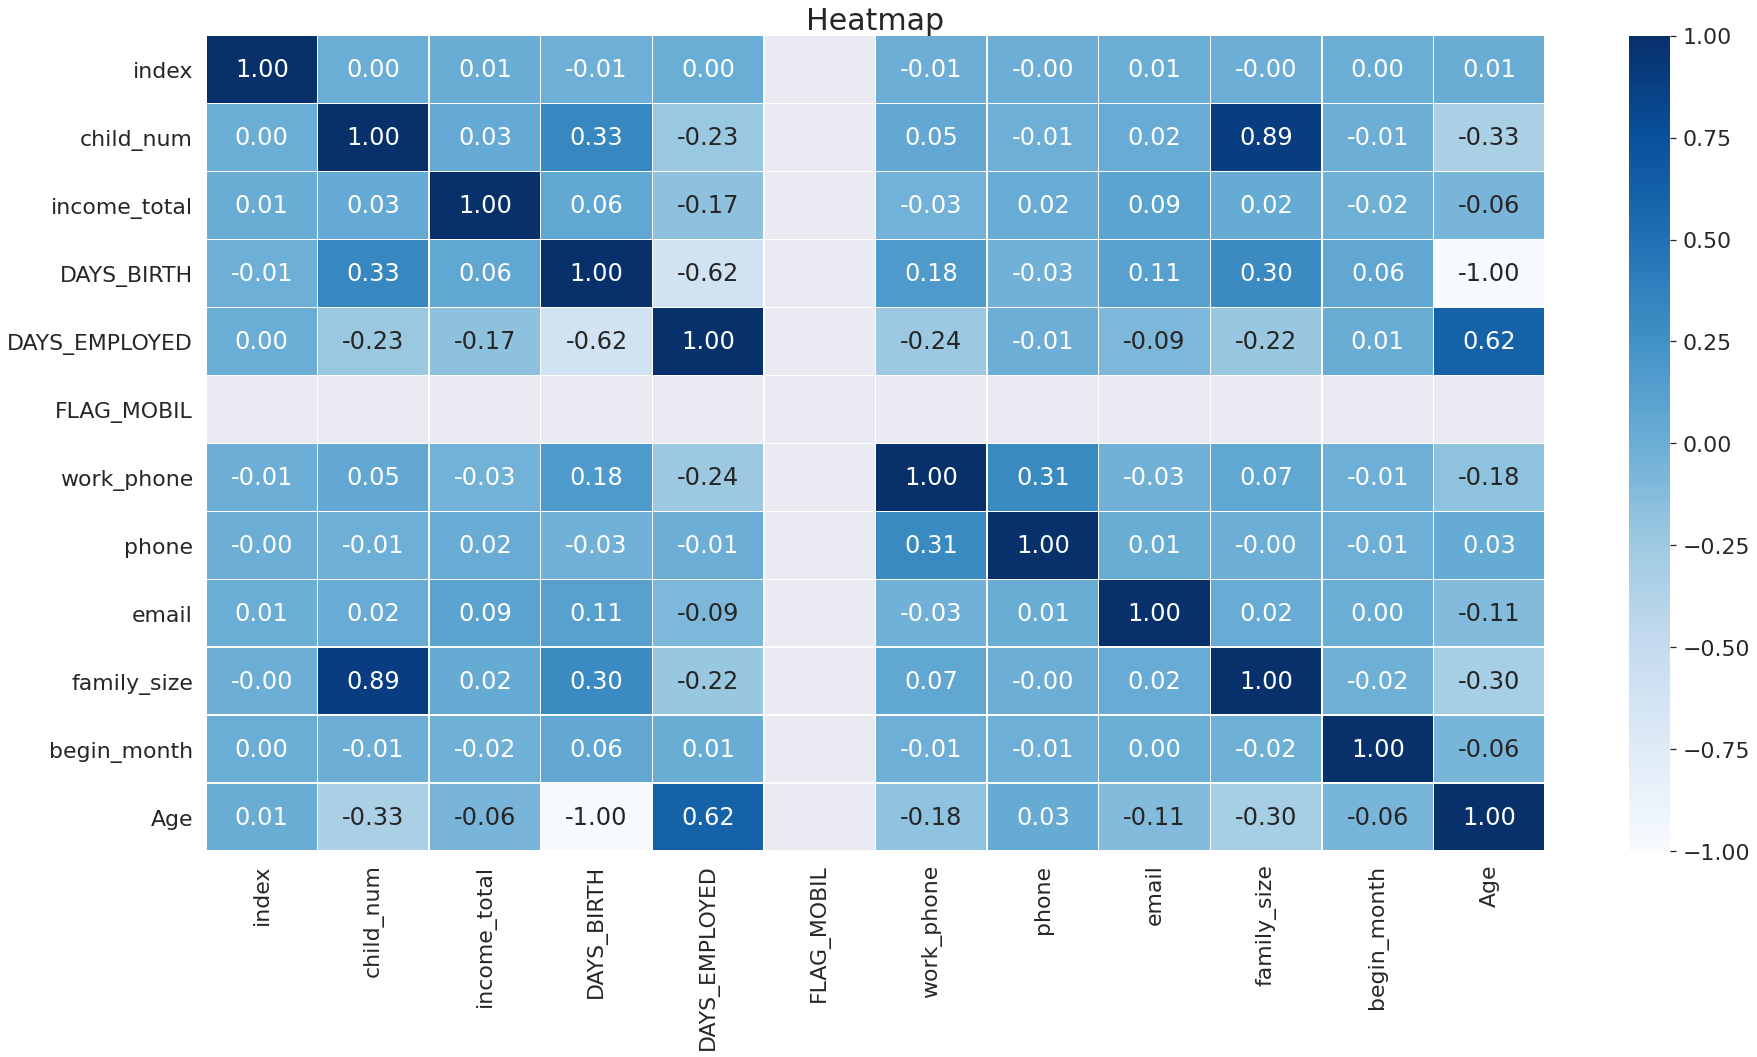

In [ ]:
plt.figure(figsize=(30,15))
plt.title('Heatmap', fontsize = 30)
sns.heatmap(corr,annot=True, cmap='Blues',fmt = '.2f', linewidths=.5)
plt.show()

- 위 Heatmap을 보면 가족 규모와 자녀 수가 0.89의 강한 상관관계를 가지고 있는 데, 자녀수가 많을수록 가족규모가 커지는 일은 당연한 일이라고 생각된다.

- 필자는 신용등급이 나이, 가족 규모, 신용카드 발급 월,업무기간(근무기간) 별로 유의미한 차이가 있다고 가정하고 EDA를 진행하려 합니다.

In [ ]:
# Numerical 그래프 함수 정의
def num_plot(column,a):
  
  fig, axes = plt.subplots(1, 3, figsize=(25, 10))
  cmap = plt.get_cmap("Paired") #파스텔컬러 모음 선택
  pick_color1=cmap(np.array([0,1,2,3,4,5,6,7,8,9,10])) #색 선택

  sns.distplot(data_0[column],
                ax = axes[0],bins=a)
  axes[0].tick_params(labelsize=12)
  axes[0].set_title('credit = 0')
  axes[0].set_ylabel('count')

  sns.distplot(data_1[column],
                ax = axes[1],bins=a)
  axes[1].tick_params(labelsize=12)
  axes[1].set_title('credit = 1')
  axes[1].set_ylabel('count')

  sns.distplot(data_2[column],
                ax = axes[2],bins=a)
  axes[2].tick_params(labelsize=12)
  axes[2].set_title('credit = 2')
  axes[2].set_ylabel('count')
  plt.subplots_adjust(wspace=0.3, hspace=0.3)


###- **신용등급에 따른 연령대 차이는?**

- 연령 정보의 최대/최소 값을 알아본 후, 그래프를 그려본다.

In [ ]:
data['Age'].max(),data['Age'].min()

(69.86666666666666, 21.40277777777778)

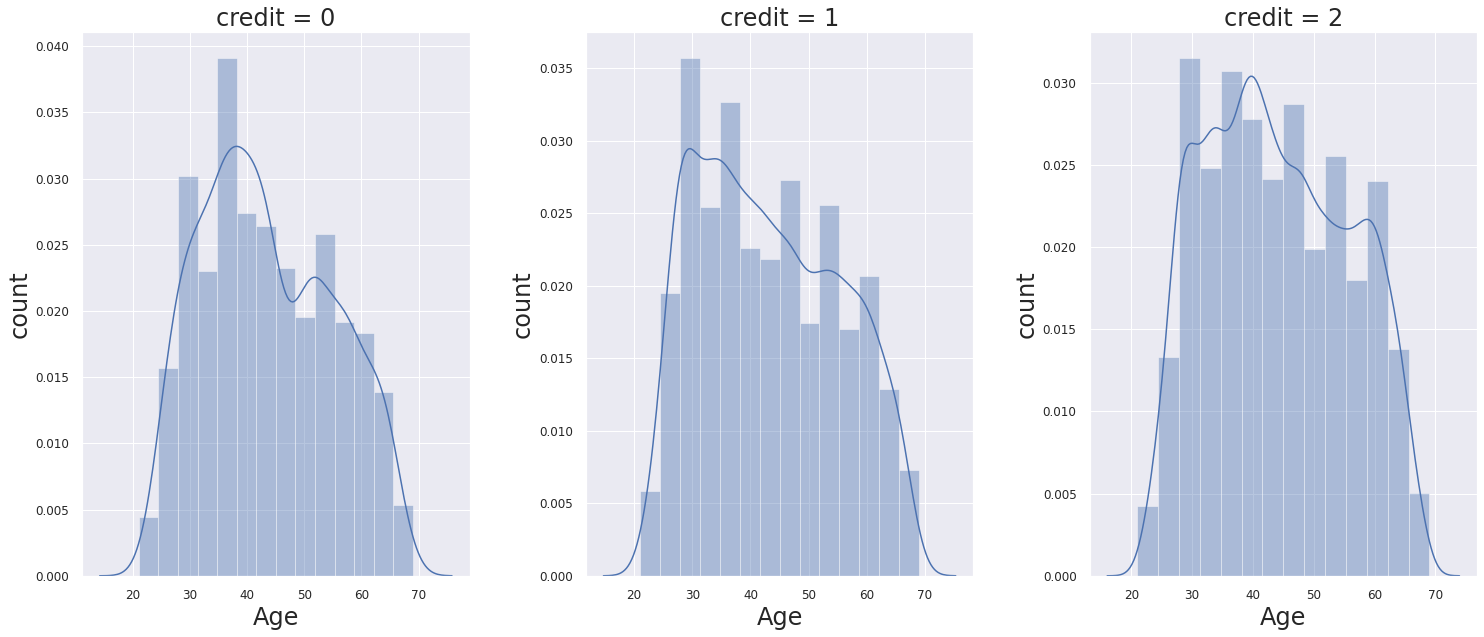

In [ ]:
num_plot("Age",14)

- 20대가 모든 등급에서 낮은것으로 보여지며, 30~40대의 경우는 약간 차이가 있어 보입니다.

###- **신용등급에 따른 가족 규모 차이는?**

In [ ]:
data['family_size'].max(),data['family_size'].min()

(20.0, 1.0)

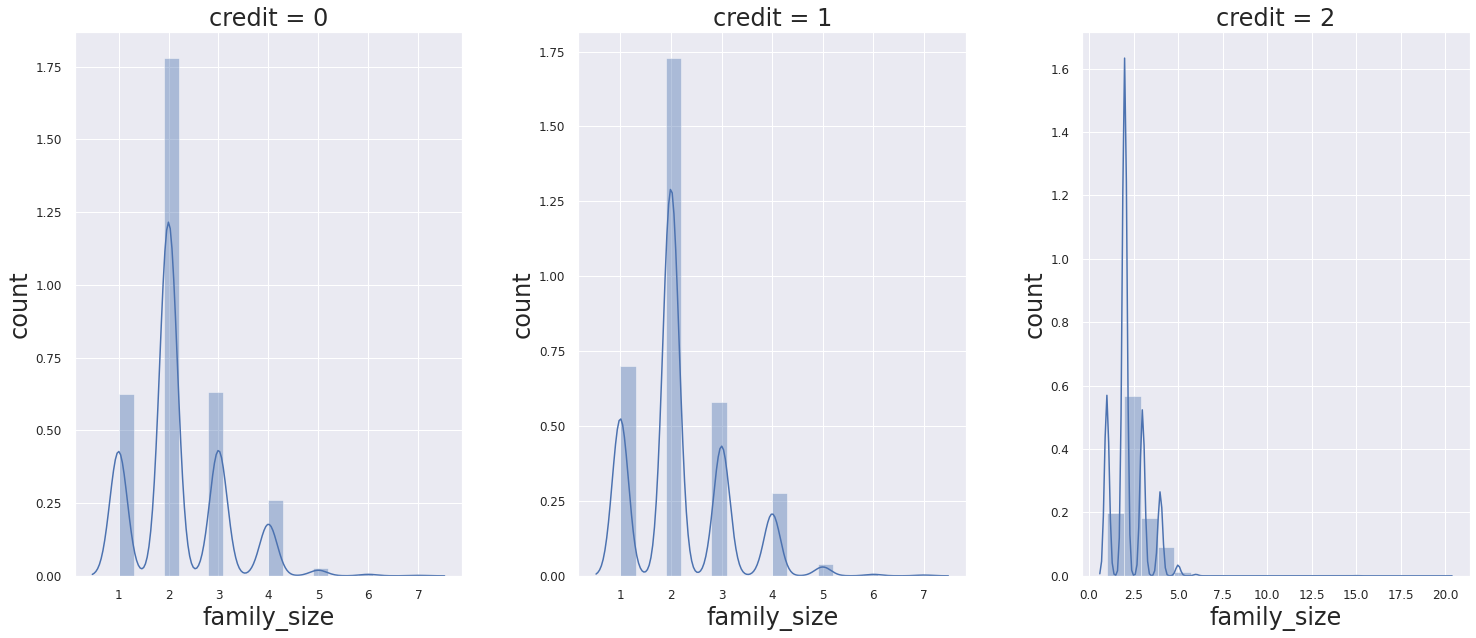

In [ ]:
num_plot("family_size",20)

- 0,1 등급에서 가족 구성원이 2명인 경우가 많았습니다.
- 신용 2등급의 경우 가족 구성이 적은 사람들이 많았습니다.


###- **신용등급에 따른 카드 발급 기간 차이는?**

In [ ]:
data['begin_month'].max(),data['begin_month'].min()

(0.0, -60.0)

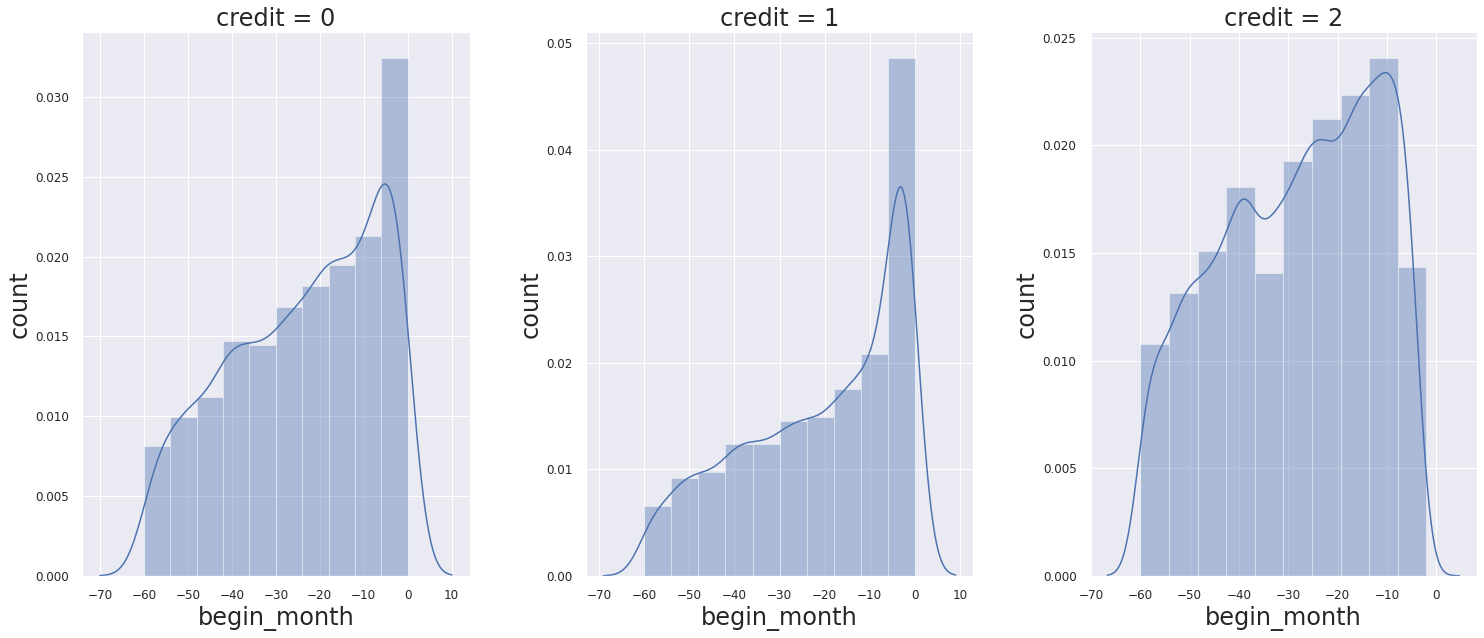

In [ ]:
num_plot("begin_month",10)

- 모든 등급에서 카드를 발급받은지 10달 이하인 고객들이 많습니다.

###- **신용등급에 따른 업무기간(근무기간)의 차이는?**

In [ ]:
data['DAYS_EMPLOYED'].max(),data['DAYS_EMPLOYED'].min()

(365243, -15713)

- 무직인 기간이 너무 다양하여 전처리 진행

In [ ]:
data_0['EMPLOYED']= data_0['DAYS_EMPLOYED'].map(lambda x: 0 if x>0 else x)
data_0 = data_0.astype({'EMPLOYED': 'int'})
data_1['EMPLOYED']= data_1['DAYS_EMPLOYED'].map(lambda x: 0 if x>0 else x)
data_1 = data_1.astype({'EMPLOYED': 'int'})
data_2['EMPLOYED']= data_2['DAYS_EMPLOYED'].map(lambda x: 0 if x>0 else x)
data_2 = data_2.astype({'EMPLOYED': 'int'})

data_0['EMPLOYED'] = abs(data_0['EMPLOYED'])/360
data_1['EMPLOYED'] = abs(data_1['EMPLOYED'])/360
data_2['EMPLOYED'] = abs(data_2['EMPLOYED'])/360
data_0['EMPLOYED'].head()

data['EMPLOYED'] = data['DAYS_EMPLOYED'].map(lambda x: 0 if x>0 else x)
data_copy = abs(data['EMPLOYED'])/360
data['EMPLOYED'].head()


0   -4709
1   -1540
2   -4434
3   -2092
4   -2105
Name: EMPLOYED, dtype: int64

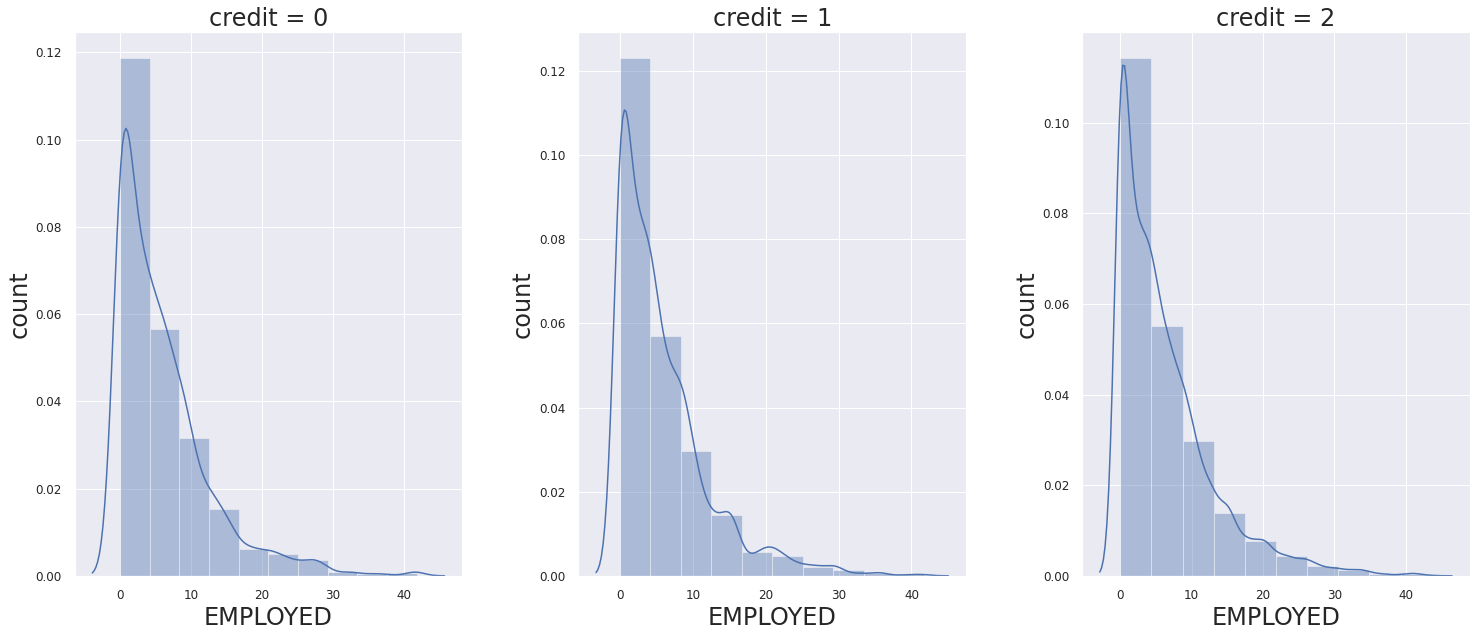

In [ ]:
num_plot("EMPLOYED",10)

- 대체적으로 무직이 많으며, 등급간 큰 차이는 보여지지 않습니다.